# Predicting Stock Prices with Linear Regression

##   Data Process

In [251]:
import numpy as np
import pandas as pd
import quandl
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import API_config
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

quandl.ApiConfig.api_key = API_config.API_KEY

### Get the Data

In [4]:
# Set start and end date for stock prices
start_date = datetime.date(2009, 3,8)
end_date = datetime.date.today()
# Load data from Quandl
data = quandl.get('FSE/SAP_X', start_date=start_date, end_date=end_date)
# Save data to CSV file
time1=[0.008672079,0.008387942,0.008951109,0.008833397,0.008872512,0.008402745,0.009101852,0.008325496]
time2=[0.013414223,0.01278019,0.013934508,0.01373398,0.013564945,0.013180364,0.01406683,0.012867559]
time3=[0.017096613,0.016649203,0.017725588,0.01745431,0.01702975,0.017145482,0.017634201,0.016710481]
time4=[0.017619387,0.018021077,0.01771596,0.017517022,0.017977132,0.017639305,0.017869264,0.017658602]
time5=[0.016316233,0.017052978,0.015853999,0.015731066,0.01722599,0.015698892,0.016967644,0.016440071]
time6=[0.013363261,0.013796949,0.013213317,0.013067386,0.014070517,0.012623441,0.01402703,0.013315947]
data=[time1,time2,time3,time4,time5,time6]

In [182]:
data.head()

,Open,High,Low,Close,Change,Traded Volume,Turnover,Last Price of the Day,Daily Traded Units,Daily Turnover
Date,,,,,,,,,,
2009-03-09,25.16,25.82,24.48,25.59,NaN,5749357.0,145200289.0,None,None,NaN
2009-03-10,25.68,26.95,25.68,26.87,NaN,7507770.0,198480965.0,None,None,NaN
2009-03-11,26.50,26.95,26.26,26.64,NaN,5855095.0,155815439.0,None,None,NaN
2009-03-12,26.15,26.47,25.82,26.18,NaN,6294955.0,164489409.0,None,None,NaN
2009-03-13,26.01,26.24,25.65,25.73,NaN,6814568.0,176228331.0,None,None,NaN


In [183]:
# Check data types in columns
data.info()
# Get descriptive statistics summary of data set
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2550 entries, 2009-03-09 to 2019-03-08
Data columns (total 10 columns):
Open                     2242 non-null float64
High                     2543 non-null float64
Low                      2543 non-null float64
Close                    2550 non-null float64
Change                   11 non-null float64
Traded Volume            2504 non-null float64
Turnover                 2497 non-null float64
Last Price of the Day    0 non-null object
Daily Traded Units       0 non-null object
Daily Turnover           7 non-null float64
dtypes: float64(8), object(2)
memory usage: 219.1+ KB


In [399]:
# Display features in data set
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover',
       'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'],
      dtype='object')

### Select Subset with relevant features

We use the daily closing price **Close** as the value to predict, so we can discard the other features.  

* 'Close' column has numerical data type
* The 'Date' is the index column and contains datetime values

In [400]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [6]:
df.head()

,Date,Close
0,2009-03-09,25.59
1,2009-03-10,26.87
2,2009-03-11,26.64
3,2009-03-12,26.18
4,2009-03-13,25.73


In [7]:
# Check data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 2 columns):
Date     2550 non-null datetime64[ns]
Close    2550 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.9 KB


In [389]:
# Check for missing values in the columns
df.isna().values.any()

False

## Explore the Data

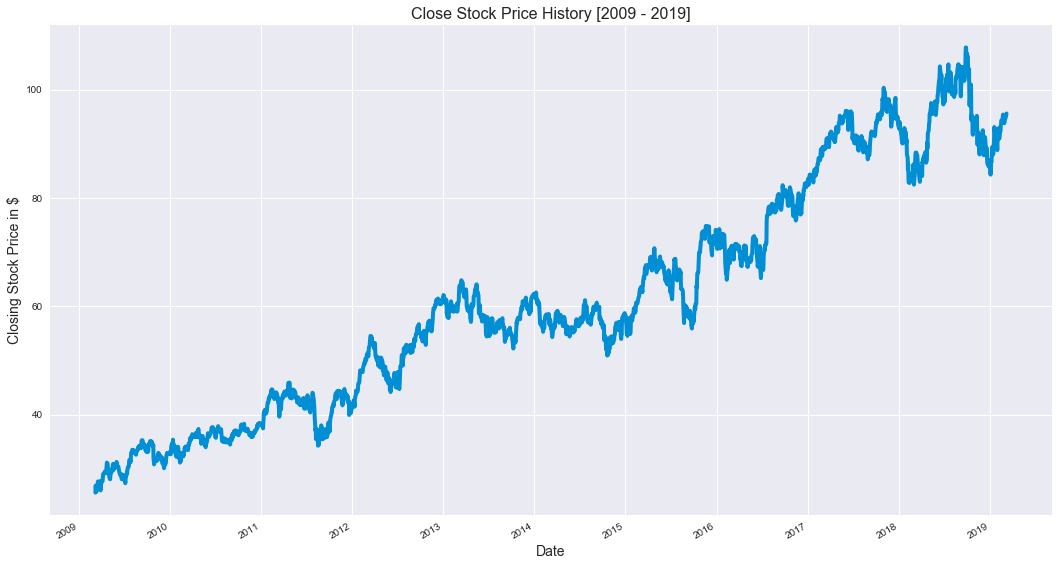

In [397]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

## Linear Regression
Training a Linear Regression Model

### Train Test Split

In [ ]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [9]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

### Create and Train the Model

In [ ]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [12]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [242]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Model Evaluation

In [428]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.02762424028961455
Intercept:  25.723432313963862


Interpreting the coefficients:

* The **slope** coefficient tells us that with a 1 unit increase in **date** the **closing price** increases by 0.0276 $
* The **intercept** coefficient is the price at wich the **closing price** measurement started, the stock price value at date zero

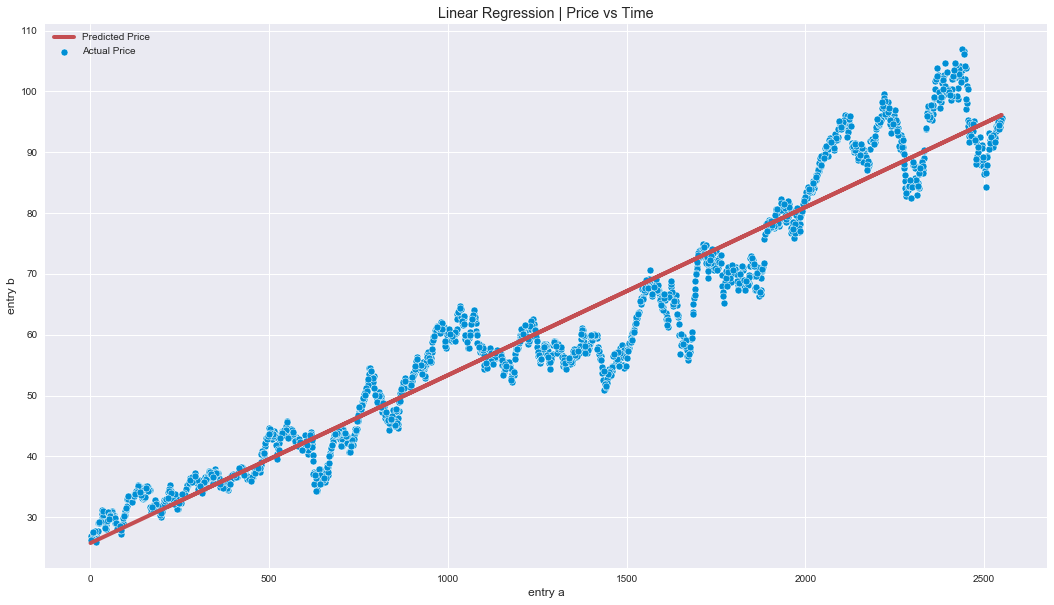

In [169]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Prediction from our Model

In [39]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [63]:
# Generate array with predicted values
y_pred = model.predict(X_test)

## Regression Evaluation

n=8
order=4
AR_coerr=np.zeros((len(X_test),5))
for i in range(len(time)):
    X = np.array([time[i][j:j+order] for j in range(len(time[i])-order)])
    y = np.array(time[i][order:])
    ar_model = sm.OLS(y, sm.add_constant(X))
    ar_model_fit = ar_model.fit()
    ar_params = ar_model_fit.params
    AR_coerr[i, :] = ar_params

    x_eval = np.array([time[i][j:j + order] for j in range(len(time[i]) - order)])
    y_eval = np.array(time[i][order:])
    ar_predictions = ar_model_fit.predict(sm.add_constant(x_eval))